<a href="https://www.kaggle.com/code/prateetichinchore/digitrecognizer1?scriptVersionId=121523210" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import seaborn as sn
import matplotlib.pyplot as plt
import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [3]:
print(train_data.head())
train_data.shape

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

(42000, 785)

In pandas, shape method returns the number of rows and columns in the DataFrame.

In [4]:
test_data.head()
test_data.shape

(28000, 784)

The iloc() function in python is defined in the Pandas module that helps us to select a specific row or column from the data set.
The iLoc function in python excludes the last index.

x is the pixel data or image itself
y is the classification data


In [5]:
data_set_for_x = train_data.iloc[:, 1:785]
data_set_for_y = train_data.iloc[:,0]
# print(data_set_for_x)
# print(data_set_for_y)

X_test = test_data.iloc[:, 0:784]

In [6]:
X_tsn = data_set_for_x/255

from sklearn.manifold import TSNE
tsne = TSNE()

tsne_res = tsne.fit_transform(X_tsn) # This method performs fit and transform on the input data at a single time and converts the data points

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


**Visualization using MATPLOTLIB**

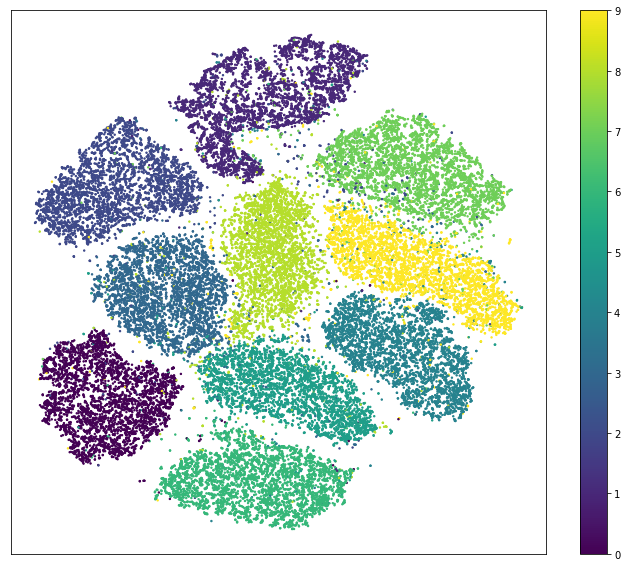

In [7]:
plt.figure(figsize=(12, 10))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=data_set_for_y, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar(); # This is the color sidebar on the right side showing scale of each color

In [8]:
from sklearn.model_selection import train_test_split
X_trainDataset, X_validationDataset, Y_trainDataset, Y_validationDataset = train_test_split(data_set_for_x, data_set_for_y, test_size = 0.2,random_state = 1212)

In [9]:
X_train_numpyReshape = X_trainDataset.to_numpy().reshape(33600, 28, 28)
Y_train_numpyReshape = Y_trainDataset.values
X_validation_re = X_validationDataset.to_numpy().reshape(8400, 28, 28)
Y_validation_re = Y_validationDataset.values
X_test_re = test_data.to_numpy().reshape(28000, 28, 28)

In [10]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = X_train_numpyReshape.shape
IMAGE_CHANNELS = 1

In [11]:
pd.DataFrame(X_train_numpyReshape[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,155,155,12,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,254,254,103,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,254,254,55,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,254,254,20,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,254,170,6,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,242,37,0,0,0,0,0,0,0,0


To show the above digit imshow function is used

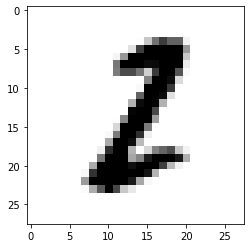

In [12]:
plt.imshow(X_train_numpyReshape[0], cmap=plt.cm.binary)

**Reshaping**

In [13]:
X_train_with_chanels = X_train_numpyReshape.reshape(
    X_train_numpyReshape.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

X_validation_with_chanels = X_validation_re.reshape(
    X_validation_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

X_test_with_chanels = X_test_re.reshape(
    X_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [14]:
print('x_train_with_chanels:', X_train_with_chanels.shape)
print('x_validation_with_chanels:', X_validation_with_chanels.shape)
print('x_test_with_chanels:', X_test_with_chanels.shape)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


**Normalizing**

In [15]:
X_train_normalized = X_train_with_chanels / 255
X_validation_normalized = X_validation_with_chanels / 255
X_test_normalized = X_test_with_chanels / 255

In [16]:
print(X_train_normalized[0][10])

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.02352941]
 [0.99607843]
 [0.99607843]
 [0.99607843]
 [0.76862745]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


**Building model**

Add: Layer that adds a list of inputs.
Activation: Applies an activation function to an output.
Convolution2D: 2D convolution layer (e.g. spatial convolution over images).
MaxPooling2D: Max pooling operation for 2D spatial data.
Flatten: Flattens the input. Does not affect the batch size.
Dense: Just your regular densely-connected NN layer.
Dropout: Applies Dropout to the input.

In [17]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

The axis argument sets which axis of the input the function is applied along.
**Softmax** is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

**Model Viz.**

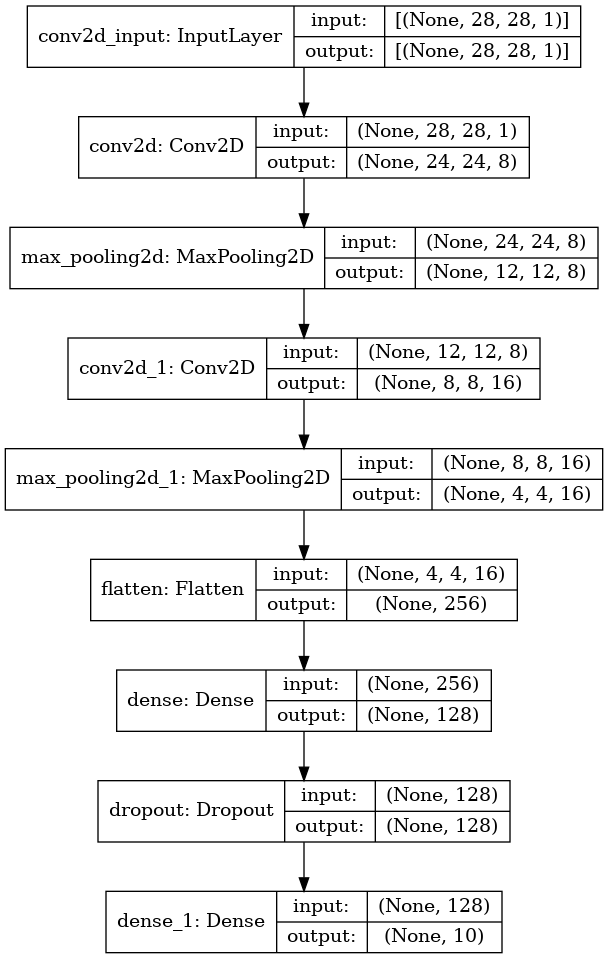

In [19]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

The Adaptive Movement Estimation algorithm, or Adam for short, is an extension to gradient descent and a natural successor to techniques like AdaGrad and RMSProp that automatically adapts a learning rate for each input variable for the objective function and further smooths the search process by using an exponentially decreasing moving average of the gradient to make updates to variables.



In [20]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

**Training model**

In [21]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    X_train_normalized,
    Y_train_numpyReshape,
    epochs=10,
    validation_data=(X_validation_normalized, Y_validation_re),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")

Epoch 1/10
1050/1050 [==============================] - 7s 6ms/step - loss: 0.2736 - accuracy: 0.9159 - val_loss: 0.0806 - val_accuracy: 0.9749
Epoch 2/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0854 - accuracy: 0.9735 - val_loss: 0.0551 - val_accuracy: 0.9810
Epoch 3/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0598 - accuracy: 0.9818 - val_loss: 0.0456 - val_accuracy: 0.9858
Epoch 4/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0491 - accuracy: 0.9842 - val_loss: 0.0436 - val_accuracy: 0.9865
Epoch 5/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0406 - accuracy: 0.9866 - val_loss: 0.0396 - val_accuracy: 0.9873
Epoch 6/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0324 - accuracy: 0.9896 - val_loss: 0.0369 - val_accuracy: 0.9894
Epoch 7/10
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0291 - accuracy: 0.9907 - val_loss: 0.0472 - val_accuracy:

**Loss plot curve for training and validation**

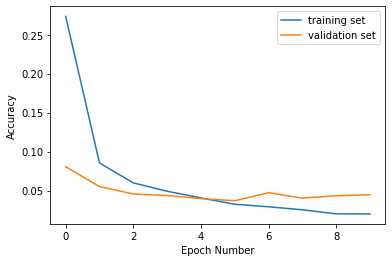

In [22]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

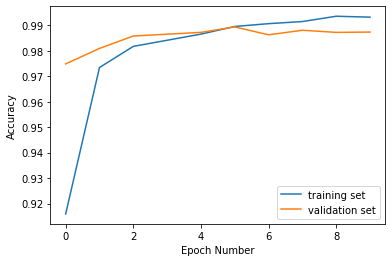

In [23]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

**Performance**

In [24]:
%%capture
train_loss, train_accuracy = model.evaluate(X_train_normalized, Y_train_numpyReshape)

In [25]:
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

Train loss:  0.010276205837726593
Train accuracy:  0.9966369271278381


**Save**

In [26]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')
loaded_model = tf.keras.models.load_model(model_name)


In [27]:
predictions_one_hot = loaded_model.predict([X_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (28000, 10)


**Testing using test data**

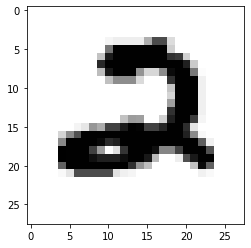

In [28]:
plt.imshow(X_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

In [29]:
test_pred = pd.DataFrame( loaded_model.predict([X_test_normalized]))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [30]:
test_pred.to_csv('submission.csv', index = False)